In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Đọc file subject_info
subject_info = pd.read_csv('/content/drive/MyDrive/BIgData Course/subject-info.csv')

# Đọc file quality_hr_ann
quality_hr_ann = pd.read_csv('/content/drive/MyDrive/BIgData Course/quality-hr-ann.csv')

# Hiển thị vài dòng đầu tiên
print(subject_info.head())
print(quality_hr_ann.head())

       ID Gender  Age [years]  Height [cm]  Weight [kg]  Ear/finger Motion  \
0  100001      F           51          NaN           58           1      0   
1  100002      F           51          NaN           58           1      0   
2  100003      F           51          NaN           58           1      0   
3  100004      F           51          NaN           58           1    2;3   
4  101001      F           54          NaN           63           1      0   

  Blood pressure [mmHg]  Glycaemia [mmol/l]  SpO2 [%]  
0                   NaN                 NaN       NaN  
1                   NaN                 NaN       NaN  
2                   NaN                 NaN       NaN  
3                   NaN                 NaN       NaN  
4                   NaN                 NaN       NaN  
       ID  Quality  HR
0  100001        1  83
1  100002        1  85
2  100003        1  81
3  100004        0  85
4  101001        1  67


In [30]:
# Kiểm tra kiểu dữ liệu từng cột
print("subject info Data Types:\n", subject_info.dtypes)
print("\nquality hr ann Data Types:\n", quality_hr_ann.dtypes)

subject info Data Types:
 ID                         int64
Gender                    object
Age [years]                int64
Height [cm]              float64
Weight [kg]                int64
Ear/finger                 int64
Motion                    object
Blood pressure [mmHg]     object
Glycaemia [mmol/l]       float64
SpO2 [%]                 float64
dtype: object

quality hr ann Data Types:
 ID         int64
Quality    int64
HR         int64
dtype: object


###Làm sạch dữ liệu

In [31]:
# Đổi tên cột
subject_info.rename(columns={
    "Age [years]": "Age",
    "Height [cm]": "Height",
    "Weight [kg]": "Weight",
    "Ear/finger": "Ear_Finger",
    "Blood pressure [mmHg]": "Blood_Pressure",
    "Glycaemia [mmol/l]": "Glycaemia",
    "SpO2 [%]": "SpO2"
}, inplace=True)

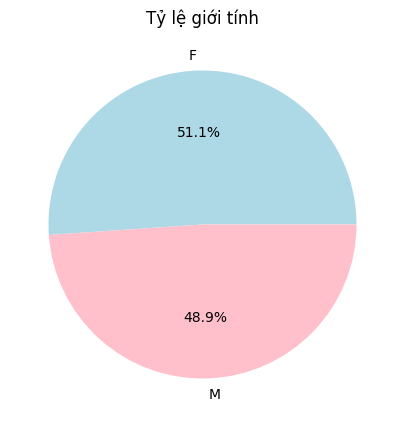

In [32]:
# 1. Biểu đồ tròn: Tỷ lệ giới tính
plt.figure(figsize=(5, 5))
subject_info["Gender"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["lightblue", "pink"])
plt.title("Tỷ lệ giới tính")
plt.ylabel('')
plt.show()

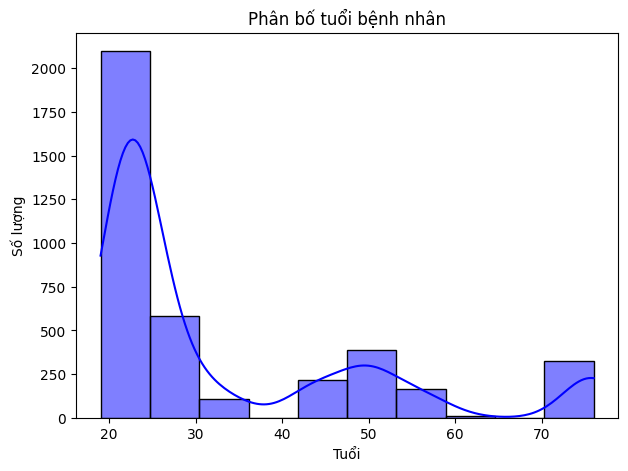

In [33]:

# 2. Histogram: Phân bố tuổi bệnh nhân
plt.figure(figsize=(7, 5))
sns.histplot(subject_info["Age"].dropna(), bins=10, kde=True, color="blue")
plt.title("Phân bố tuổi bệnh nhân")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng")
plt.show()

<ipython-input-34-65224572cc21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Quality", y="HR", data=quality_hr_ann, palette="pastel")


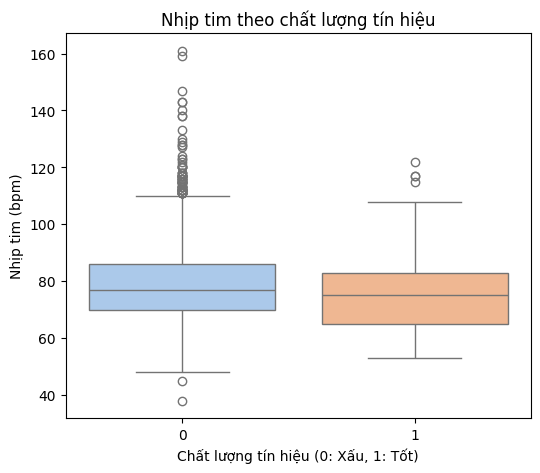

In [34]:

# 3. Boxplot: So sánh nhịp tim theo chất lượng tín hiệu
plt.figure(figsize=(6, 5))
sns.boxplot(x="Quality", y="HR", data=quality_hr_ann, palette="pastel")
plt.title("Nhịp tim theo chất lượng tín hiệu")
plt.xlabel("Chất lượng tín hiệu (0: Xấu, 1: Tốt)")
plt.ylabel("Nhịp tim (bpm)")
plt.show()


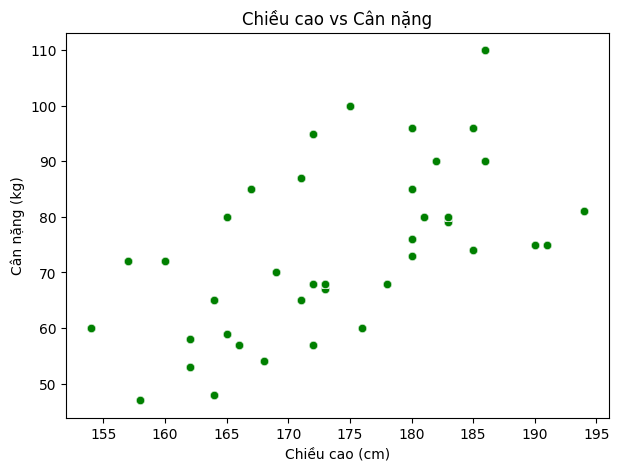

In [35]:
# 4. Scatter plot: Mối quan hệ giữa chiều cao và cân nặng
plt.figure(figsize=(7, 5))
sns.scatterplot(x="Height", y="Weight", data=subject_info, color="green", alpha=0.7)
plt.title("Chiều cao vs Cân nặng")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (kg)")
plt.show()

<ipython-input-36-5aaee3e0eb13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ear_Finger", data=subject_info, palette="coolwarm")


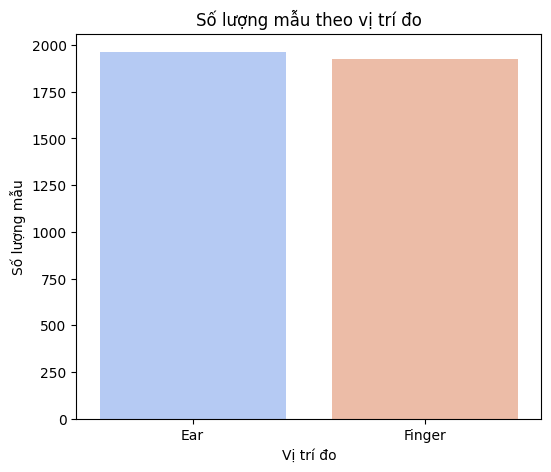

In [36]:

# 5. Biểu đồ cột: Số lượng mẫu theo vị trí đo (ear/finger)
plt.figure(figsize=(6, 5))
sns.countplot(x="Ear_Finger", data=subject_info, palette="coolwarm")
plt.xticks([0, 1], ["Ear", "Finger"])
plt.title("Số lượng mẫu theo vị trí đo")
plt.xlabel("Vị trí đo")
plt.ylabel("Số lượng mẫu")
plt.show()